In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle
import utilities

# Setting parameters
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (16, 8)

# Question to answer: 

### What topics are grads continuing to reference after graduation and into their jobs (for each program)?

Pulling in data and cleaning/preparing it slightly 

In [2]:
df = pd.read_csv('logs_data.csv', index_col=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 48.1+ MB


In [4]:
cohorts = pd.read_csv('cohorts_data.csv')
cohorts = cohorts.drop(columns = ['Unnamed: 0', 'slack', 'created_at', 'updated_at', 'deleted_at'])
combined_df = pd.merge(df, cohorts, how = 'outer', left_on = 'cohort_id', right_on= 'id')

In [5]:
combined_df

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id
0,0.0,2018-01-26,09:55:03,/,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
1,1.0,2018-01-26,09:56:02,java-ii,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2,2.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
3,3.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
4,58.0,2018-01-26,10:40:15,javascript-i/functions,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Balboa,2015-11-03,2016-03-11,4.0
900225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,Redwood,2017-07-31,2017-12-06,2.0
900226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,Ada,2019-02-04,2019-06-16,3.0
900227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Io,2020-07-20,2021-01-21,2.0


In [6]:
# Getting ride of the rows with no date

combined_df = combined_df[combined_df.date.notna()]

In [7]:
def make_datetime_index(df):
    df['datetime'] = pd.to_datetime(df.date + ' ' + df.time)
    df = df.set_index('datetime').sort_index()
    df = df.drop(columns= ['Unnamed: 0', 'date', 'time', 'id'])
    return df

In [8]:
df = make_datetime_index(combined_df)

In [9]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:55:03,/,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2.0,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900222 non-null  object 
 1   user_id     900223 non-null  float64
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   name        847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   program_id  847330 non-null  float64
dtypes: float64(3), object(5)
memory usage: 61.8+ MB


In [11]:
# Converting the other two date columns to datetime columns
df['start_date'] = pd.to_datetime(df.start_date)
df['end_date'] = pd.to_datetime(df.end_date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  float64       
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   program_id  847330 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 61.8+ MB


#### Investigating the nulls in cohort_id to see if there is a noticable pattern.

In [13]:
no_cohort = df[df.cohort_id.isna()]
no_cohort = no_cohort.dropna(axis=0, subset=['ip'])

In [14]:
no_cohort.index.min(), no_cohort.index.max()

(Timestamp('2018-01-26 16:46:16'), Timestamp('2021-04-21 12:56:26'))

Comparing to the df datetime min and max

In [15]:
df.index.min(), df.index.max()

(Timestamp('2018-01-26 09:55:03'), Timestamp('2021-04-21 16:44:39'))

No difference, looking at the distribution of times for no_cohort access

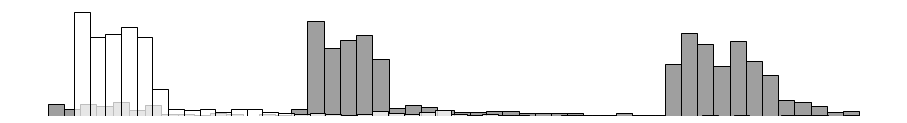

In [42]:
plt.figure(figsize = (16, 2))
ax = sns.histplot(data=no_cohort.index, bins = 50, color = 'grey')
ax2 = sns.histplot(data=df[df.cohort_id == 23].index, bins =50, color = 'white')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
ax.axis('off')
plt.savefig('demo.png', transparent= False)

comparing to overall dataframe histplot

Looks like this is a couple of unencoded cohorts?

<AxesSubplot:xlabel='datetime', ylabel='Count'>

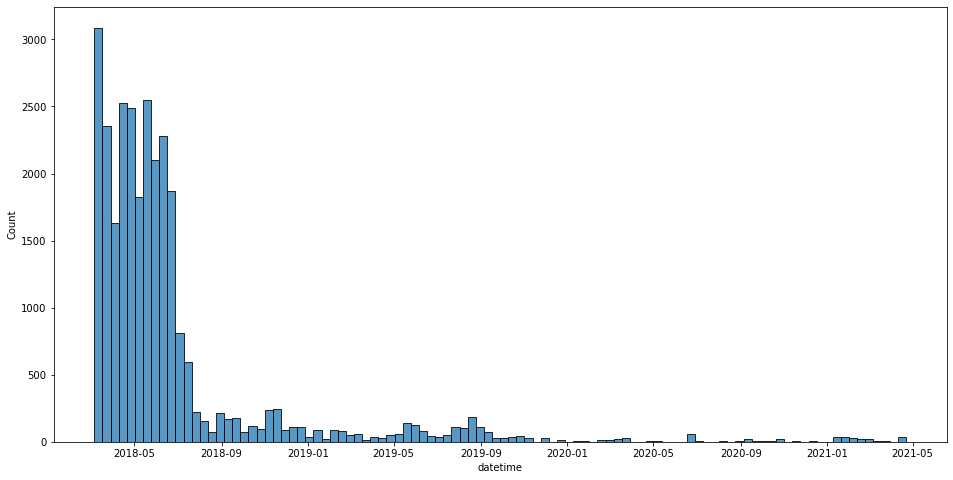

In [18]:
sns.histplot(data=df[df.cohort_id == 23].index, bins =100)

In [19]:
df[df.cohort_id == 23]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-03-05 14:22:48,html-css/css-i,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
2018-03-05 14:22:58,html-css/forms,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
2018-03-05 14:23:06,html-css/css-i,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
2018-03-05 14:23:08,html-css/css-i/introduction,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
2018-03-05 14:23:47,html-css,25.0,23.0,97.105.19.61,Ulysses,2018-03-05,2018-07-19,2.0
...,...,...,...,...,...,...,...,...
2021-04-20 15:31:29,spring,122.0,23.0,69.130.123.181,Ulysses,2018-03-05,2018-07-19,2.0
2021-04-20 17:53:45,javascript-i/functions,126.0,23.0,192.107.1.225,Ulysses,2018-03-05,2018-07-19,2.0
2021-04-21 13:54:53,/,122.0,23.0,134.250.1.82,Ulysses,2018-03-05,2018-07-19,2.0


Shows variation in the access times between no_cohort and df

In [ ]:
no_cohort.user_id.value_counts()

Therea are 78 users who have no cohort.

In [ ]:
no_cohort.path.value_counts().head(25)

In [ ]:
df.name.sort_values().unique()

### Exploring other various data before jumping back to my question.

In [ ]:
df.program_id.unique()

In [ ]:
df[(df.name == "Ada") | (df.name == 'Bayes')].program_id.unique()

Program id 3 corresponds to Data Science.

In [ ]:
df[df.program_id == 3].name.unique()

Confirmed, according to alumni.codeup.comm these are all DS program students

In [ ]:
df[(df.name == "Arches") | (df.name == 'Badlands')].program_id.unique()

Program id 1 corresponds to WebDev

In [ ]:
df[df.program_id == 1].name.sort_values().unique()

Confirmed, according to alumni.codeup.com these are all WebDev program students

In [ ]:
df[df.program_id == 2].name.sort_values().unique()

Program 2 corresponds to WebDev program students as confirmed by alumni.codeup.com

In [ ]:
df[df.program_id == 4].name.sort_values().unique()

Program 4 corresponds to WebDev program students as confirmed by alumni.codeup.com

Program id corresponds as follows:
- 1, 2, 4 are all WebDev students
- 3 is Data Scientist students

Based on this information I'm going to split the WebDev students and DS students to see if there is any difference when answering my question.

In [ ]:
ds = df[df.program_id == 3]

In [ ]:
ds.head()

In [ ]:
webdev = df[df.program_id != 3]

In [ ]:
webdev.head()

# Back to my main question:
### What topics are grads continuing to reference after graduation and into their jobs (for each program)?

Before I do anything I need to remove staff from my exploration as my question specifically pertains to grads.

In [ ]:
ds = ds[ds.name != 'Staff']

In [ ]:
webdev = webdev[webdev.name != 'Staff']

First I need to explore if these logs refer to access to the curriculum AFTER the graduation date only or for ALL time (even when they were students)

In [ ]:
for cohort in df.name.unique():
    print(f"The {cohort} cohort ended on {df[df.name == cohort].end_date.min()} "
          f"and the earliest recorded access was on {df[df.name == cohort].index.min()}\n")

This information shows that there is a good portion of the data that occurs PRIOR to students graduation so I need to clean this up and only have logs that show data from after. I will reset this and proceed to analyze.

In [ ]:
ds.info()

In [ ]:
ds_after_grad = ds[ds.index > ds.end_date]

In [ ]:
ds_after_grad.info()

In [ ]:
ds_after_grad.shape[0] / ds.shape[0]

Alright, ds_after_grad represents the access logs which occurred after a person graduated for ds students. As a note, it seems that after graduation access of the curriculum only accounts for 11.2% of all access logs; this means that roughly 89% of all the access logs refer to times when the student was enrolled in the program at Codeup.

I will do this now for webdev.

In [ ]:
webdev.info()

In [ ]:
wd_after_grad = webdev[webdev.index > webdev.end_date]

In [ ]:
wd_after_grad.info()

In [ ]:
wd_after_grad.shape[0] / webdev.shape[0]

wd_after_grad represents the access logs which occurred after a person graduated for webdev students. As a note, it seems that after graduation, access of the curriculum only accounts for 14.7% of all access logs; this means that roughly 85% of all the access logs refer to times when the student was enrolled in the program at Codeup.

#### The data is now in a place that I can begin exploring what topics grads are referencing after graduation.

I will explore the webdev group first.

In [ ]:
wd_after_grad.path.value_counts().head(10)

Two of the top five most commonly accessed paths are not indicative of topics. The '/' directory just refers to the base directory from which a student would access the specific curriculum they were looking for and the 'search/search_index.json' paths refers to the search, not an actual topic location. I will drop these two for ease of searching through the data.

In [ ]:
wd_after_grad = wd_after_grad[(wd_after_grad.path != '/') & (wd_after_grad.path != 'search/search_index.json')]

In [ ]:
wd_after_grad.path.value_counts().head(50)

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')]

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].path.unique()

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('css')]

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('sql')]

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('php')]

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('spring')]

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('jquery')]

In [ ]:
wd_after_grad.path.value_counts().tail(60)

Most of these seem to be ds topics or other random page I will categorize as one catch all "random" category.

Going to make a dataframe which contains all this info about topic and amount of requests


In [ ]:
wd_results = {'topic': ['javascript', 'java', 'css', 'spring', 'sql', 'jquery', 'appendix', 'capstone', 'random/ds_topics'], 
              'num_times_accessed': [wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('css')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('spring')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('sql')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('jquery')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('appendix')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('capstone')].shape[0],
                                wd_after_grad.shape[0]- wd_after_grad[wd_after_grad.path.str.contains('java|sql|jquery|spring|css|appendix|capstone|toc')].shape[0]]}

In [ ]:
wd_results_df = pd.DataFrame(wd_results).sort_values('num_times_accessed', ascending=False)

In [ ]:
sns.barplot(data= wd_results_df, x = 'topic', y = 'num_times_accessed')

In [ ]:
wd_results_df

In [ ]:
wd_after_grad.info()

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].shape[0] / wd_after_grad.shape[0]

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')].shape[0] / wd_after_grad.shape[0]

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('spring')].shape[0] / wd_after_grad.shape[0]

This shows that the most broad topics accessed after graduation are java and javascript. 
- Java accounted for 21.5% of all content accessed.
- Javascript account for 20.6% of all content accessed.


I will get a bit more granular next.

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].path.value_counts().head(50)

For java we see the single largest subtopic being the java-i main directory at 2275 entries and second the java-ii main directory at 2184 entries; the largest specific sub-topics are java-i/introduction-to-java at 894 entries, java-i/syntax-types-and-variables 847 entries, /object-oriented-programming at 822, and /servlets at 811.

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')].path.value_counts().head(50)

For javascript we have the single largest subtopic being the javascript-i main directory at 3152 entries and second being the javascript-ii main directory at 1988 entries; the largest specifc sub-topics are javascript-i/functions at 785 entries and javascript-i/javascript-with-html 775 entries.

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('spring')].path.value_counts().head(50)

For spring we have the single largest subtopic being the spring main directory at 2869; the largest specifc sub-topics are /fundamentals/controllers at 1299 entries, /setup with 1236 entries, fundamentals/views at 1166 entries, and /fundamentals/repositories at 1073 entries.

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('css')].path.value_counts().head(50)

For css we have the single largest subtopic being the html-css main directory at 2403; the largest specifc sub-topics are /elements at 937 entries, and /introduction at 800 entries.

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('sql')].path.value_counts().head(50)

No single specific subtopic over 800 entries for sql.

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('jquery')].path.value_counts().head(50)

In [ ]:
wd_after_grad[wd_after_grad.path.str.contains('appendix')].path.value_counts().head(50)

No specific sub-topic breaks 800 entries in jquery or appendix.

In [ ]:
# Making a dataframe to contain the most accessed subtopics
sub_topics_list = ['java-i/introduction-to-java', 
                   'java-i/syntax-types-and-variables', 
                   'java-ii/object-oriented-programming', 
                   'java-iii/servlets', 
                   'javascript-i/functions', 
                   'javascript-i/javascript-with-html', 
                   'spring/fundamentals/controllers', 
                   'spring/setup', 
                   'spring/fundamentals/views',
                   'spring/fundamentals/repositories',
                   'html-css/elements',
                   'html-css/introduction']
occurances_list = [894, 847, 822, 811, 785, 775, 1299, 1236, 1166, 1073, 937, 800]
wd_subtopics = {'subtopic': sub_topics_list, 'num_times_accessed': occurances_list}

In [ ]:
wd_subtopics

In [ ]:
wd_subtopics_df = pd.DataFrame(wd_subtopics).sort_values('num_times_accessed', ascending=False)
wd_subtopics_df

In [ ]:
ax = sns.barplot(data= wd_subtopics_df, x = 'subtopic', y = 'num_times_accessed')
plt.xticks(rotation=65)
plt.show()

## WebDev takeaways

- Java and Javascript were by far the largest categories represented in the main topics
    - Java accounted for 21.5% of all content accessed.
    - Javascript account for 20.6% of all content accessed.
- Spring however had the most subtopics represented in the top subtopic categories.
    - Top 4 single lessons were over Spring
        - spring/fundamentals/controllers
        - spring/setup
        - spring/fundamentals/views
        - spring/fundamentals/repositories

In [ ]:
ds_after_grad = ds_after_grad[(ds_after_grad.path != '/') & (ds_after_grad.path != 'search/search_index.json')]
ds_after_grad

In [ ]:
ds_after_grad.path.value_counts().tail(60)

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('sql')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('python')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('classification')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('anomaly')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('fundamentals', case = False)]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('clustering')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('timeseries')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('appendix')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('nlp')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('regression')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('stats')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('capstone')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('storytelling')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('spark')]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('capstone|sql|python|stats|fundamentals|regression|clustering|nlp|appendix|timeseries|anomaly|classification|spark|python|storytelling')]



In [ ]:
ds_results = {'topic': ['capstone','sql','python', 'stats', 'fundamentals', 'regression', 'clustering', 'nlp', 'appendix', 'timeseries', 'anomaly', 'classification', 'spark', 'python', 'storytelling','other_topics'], 
              'num_times_accessed': [ds_after_grad[ds_after_grad.path.str.contains('capstone', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('sql', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('python', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('stats', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('fundamentals', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('regression', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('clustering', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('nlp', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('appendix', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('timeseries', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('anomaly', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('classification', case = False)].shape[0], 
                                ds_after_grad[ds_after_grad.path.str.contains('spark', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('python', case = False)].shape[0],
                                ds_after_grad[ds_after_grad.path.str.contains('storytelling', case = False)].shape[0],
                                ds_after_grad.shape[0]- ds_after_grad[ds_after_grad.path.str.contains('capstone|sql|python|stats|fundamentals|regression|clustering|nlp|appendix|timeseries|anomaly|classification|spark|python|storytelling')].shape[0]]}

In [ ]:
ds_results_df = pd.DataFrame(ds_results).sort_values('num_times_accessed', ascending=False)

In [ ]:
ds_results_df

In [ ]:
sns.barplot(data= ds_results_df, x = 'topic', y = 'num_times_accessed')

This shows that the most broad topics accessed after graduation are sql, fundamentals and classification. I will get a bit more granular next.

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('sql')].path.value_counts().head(15)

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('fundamentals')].path.value_counts().head(10)

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('classification')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('python')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('regression')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('anomaly')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('appendix')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('stats')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('timeseries')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('nlp')].path.value_counts().head()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('clustering')].path.value_counts().head()

In [ ]:
# Making a dataframe to contain the most accessed subtopics
sub_topics_list = ['sql/mysql-overview', 
                   'sql/database-design', 
                   'fundamentals/AI-ML-DL-timeline.jpg', 
                   'fundamentals/modern-data-scientist.jpg', 
                   'fundamentals/intro-to-data-science', 
                   '1-fundamentals/modern-data-scientist.jpg', 
                   '1-fundamentals/1.1-intro-to-data-science', 
                   'classification/overview', 
                   'classification/scale_features_or_not.svg',
                   '6-regression/1-overview',
                   'anomaly-detection/AnomalyDetectionCartoon.jpeg',
                   'anomaly-detection/overview']
occurances_list = [275, 87, 189, 187, 184, 128, 127, 267, 220, 86, 193, 191]
wd_subtopics = {'subtopic': sub_topics_list, 'num_times_accessed': occurances_list}

In [ ]:
ds_subtopics_df = pd.DataFrame(wd_subtopics).sort_values('num_times_accessed', ascending=False)
ds_subtopics_df

In [ ]:
ax = sns.barplot(data= ds_subtopics_df, x = 'subtopic', y = 'num_times_accessed')
plt.xticks(rotation=65)
plt.show()

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('sql')].shape[0] / ds_after_grad.shape[0]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('fundamentals')].shape[0] / ds_after_grad.shape[0]

In [ ]:
ds_after_grad[ds_after_grad.path.str.contains('classification')].shape[0] / ds_after_grad.shape[0]

In [ ]:
(ds_after_grad[ds_after_grad.path.str.contains('classification')].shape[0] +
ds_after_grad[ds_after_grad.path.str.contains('sql')].shape[0] +
ds_after_grad[ds_after_grad.path.str.contains('fundamentals')].shape[0]) / ds_after_grad.shape[0]

## Data Science takeaways

- SQL, Fundamentals, and classification were the 3 largest main topics
    - SQL accounts for 16.2% of all access
    - fundamentals accounts for 15.8% of all access
    - classification accounts for 13.7 % of all access
    - These 3 topics account for 45.8% of all access
- mysql-overview, classification/overview, and classification/scale_features_or_not.svg the three most accessed sub paths
- 5/12 of the most accessed paths were photo files
- Of the non photo files we can see:
    - a sql/overview
    - a classification-overview
    - an anomaly-detection/overview
    - fundamentals/intro-to-data-science
    - an sql/database-desing
    - a regression/overview

# Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

**Key Conclusion:** 
For the Web Development program Java lessons account for 21.5%, Javascript lessons account for 20.6%, and Spring lessons account for 13.3% of all content accessed by WebDev grads after graduation. Of note, the top four most accessed lessons were all covering Spring.

For the Data Science program SQL lessons account for 16.2%, Fundamentals lessons account for 15.8%, and Classification lessons account for 13.7% of all content accessed by DS grads after graduation.

In [ ]:
df = wrangle.wrangle_logs()

In [ ]:
# Dropping staff from the dataframe so as to only evaluate students
cleaned = df[df.name != 'Staff']

# Since the '/' and the 'search/search_index.json' paths are not actual topic locations, I will drop these two paths.
cleaned = cleaned[(cleaned.path != '/') & (cleaned.path != 'search/search_index.json')]

# Removing any access logs that occurred prior the the cohort finishing at Codeup as the question asks about post 
# graduation access.
cleaned = cleaned[cleaned.date > cleaned.end_date]

When comparing program ids to cohort names, according to the https://alumni.codeup.com/ website the id columns corresponds as follows:
- Program ids 1, 2, 4 are all WebDev cohorts
- Program 3 is a Data Scientist cohort

In [ ]:
# Splitting the dataframe into Data Science and Web Development students
ds = cleaned[cleaned.program_id == 3]
webdev = cleaned[cleaned.program_id != 3]

#### Now examining just the Web Development graduates' access logs.

In [ ]:
utilities.webdev_visuals(wd_after_grad)

##### Interesting note: the top four most accessed lessons for Web Development were all covering Spring.

In [ ]:
utilities.webdev_subtopics()

#### Now examining just the Data Science graduates' access logs.

In [ ]:
utilities.ds_visuals(ds_after_grad)